# 1. Analyze the data using the same techniques as for the last assignment.
Decide for yourself which and how to use the specific commands. Answer
the following questions in the report and include figures supporting your
answers:

In [19]:
import pandas as pd

df = pd.read_csv('housing.csv', sep="\s+")

The columns mean following:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 USD
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in 1000s USD

## 1.1. Which noteworthy trends of features and relations between features as well as features and regression target do you see?

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [21]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Check for empty data cells

In [23]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Check the distribution of the target feature, the house price.
The values are distributed normally with a few outliers which need to be eliminated.

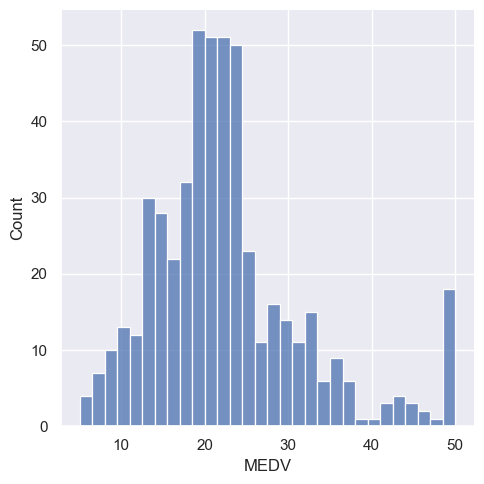

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(df['MEDV'], bins=30)
plt.show()

Check for correlated features

In [25]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


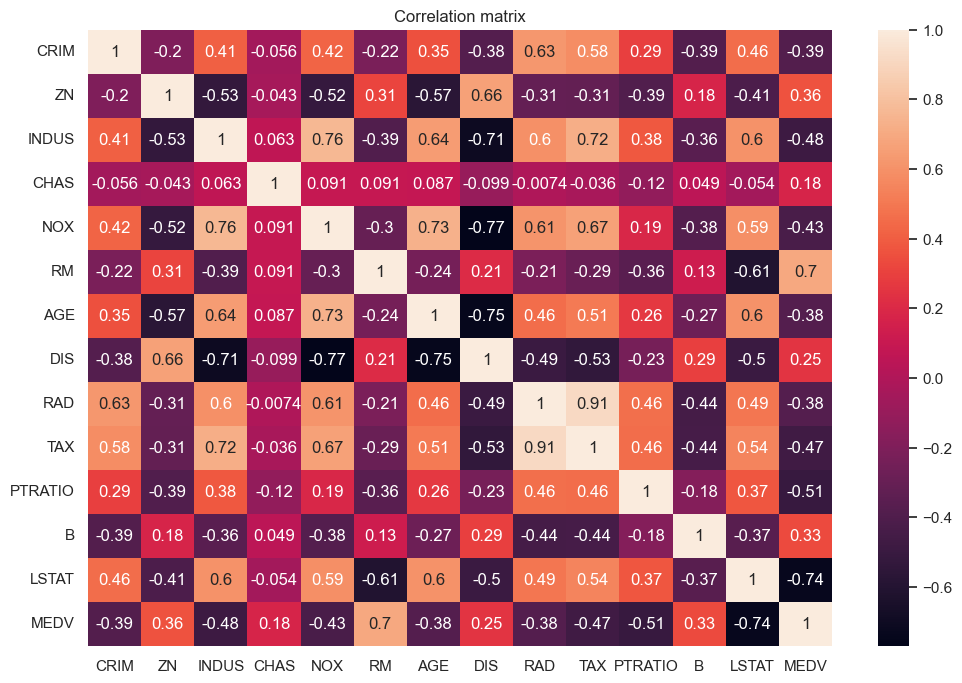

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation matrix")
plt.show()

For example higher crime rates (CRIM) results in lower average house prices (MEDV), that's why there is a negative correlation.
The house prises (MEDV) are also lower for people with lower status (LSTAT).
The target feature is MEDV, relevant features are probably the ones with a high correlation.
I would choose LSTAT, TAX, RAD, RM, PTRATIO, NOX, INDUS because they correlate with MEDV the most..

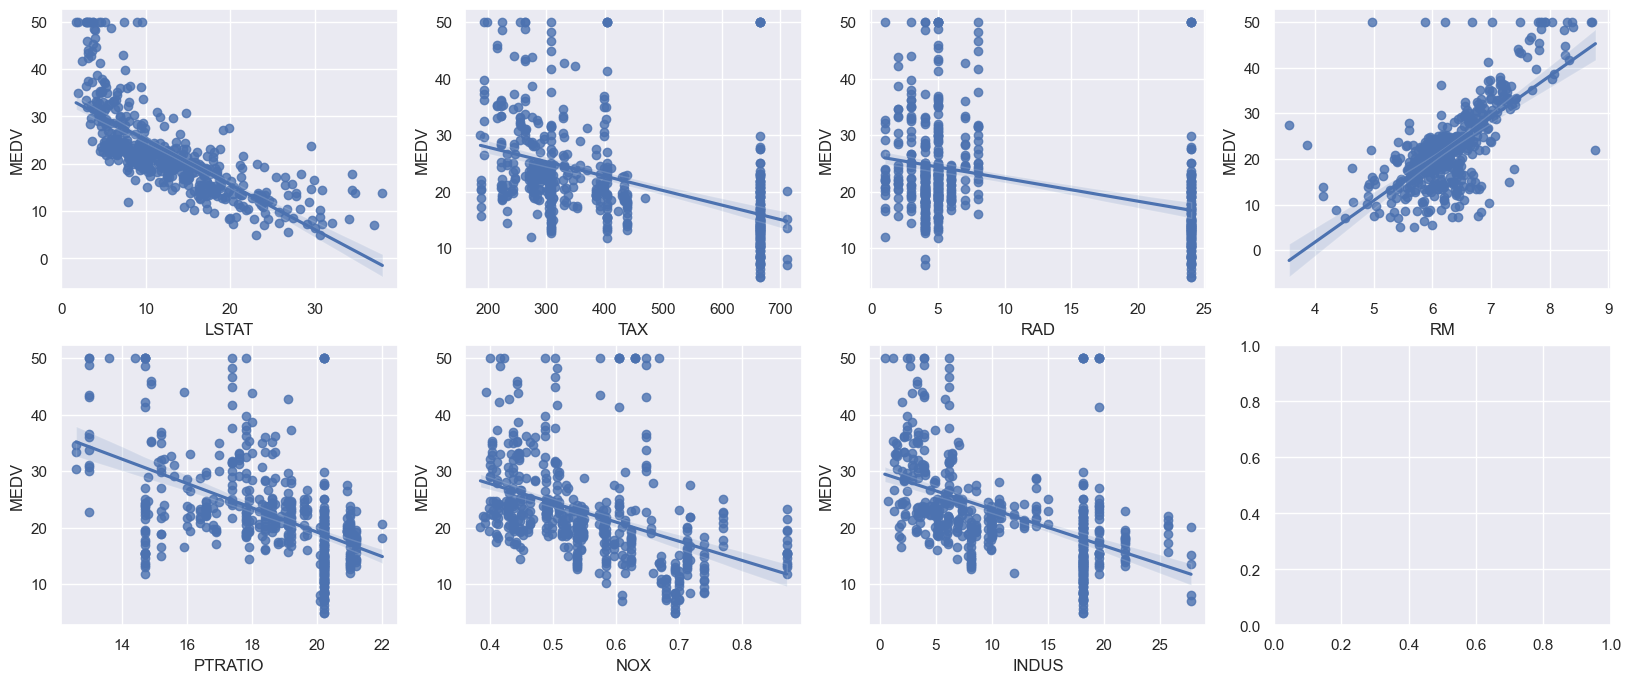

In [27]:
figure, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
cols = ['LSTAT', 'TAX', 'RAD', 'RM', 'PTRATIO', 'NOX', 'INDUS']
for col, ax in zip(cols, ax.flat):
    sns.regplot(x=df[col], y=df['MEDV'], ax=ax)

Outlier detection with box plot

<AxesSubplot: >

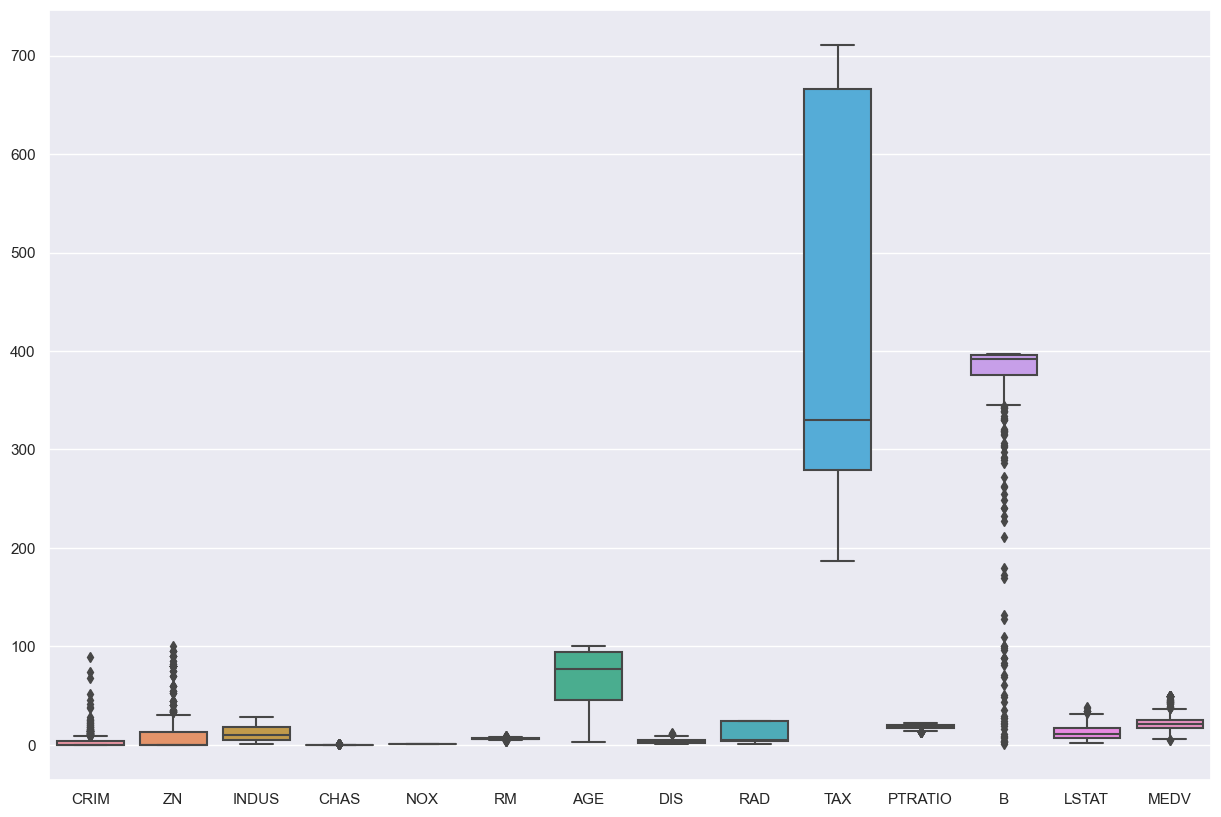

In [28]:
plt.figure(figsize=(15, 10))
sns.boxplot(df)

## 1.2. Which features would you choose to train the regression models, any why?

Probably LSTAT and RM, because they correlate highly with MEDV, looking at the correlation matrix.
Either RAD or TAX can be removed because they correlate highly and both together won't bring any benefit.

# 2. Build up your ML toolchain for this regression problem similar to the one you did for the classification and again take care of the following points:

Select features (as default all features get used)

In [29]:
X = df.drop(columns=['MEDV'], inplace=False)
y = df['MEDV']

In [30]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Remove outliers

In [31]:
X.clip(lower=X.quantile(0.01), upper=X.quantile(0.99), axis=1, inplace=True)
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.375175,11.304348,11.118875,0.069170,0.554770,6.287106,68.584506,3.778529,9.549407,407.794466,18.454743,356.715751,12.642073
std,6.908970,23.112644,6.809112,0.253994,0.115773,0.678876,28.127163,2.052652,8.707259,167.791388,2.154109,91.133441,7.074084
min,0.013610,0.000000,1.253500,0.000000,0.398000,4.524450,6.610000,1.206540,1.000000,188.000000,13.000000,6.730000,2.883000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,41.370330,90.000000,25.650000,1.000000,0.871000,8.335000,100.000000,9.222770,24.000000,666.000000,21.200000,396.900000,33.918500


Centering and scaling the values

<AxesSubplot: ylabel='Density'>

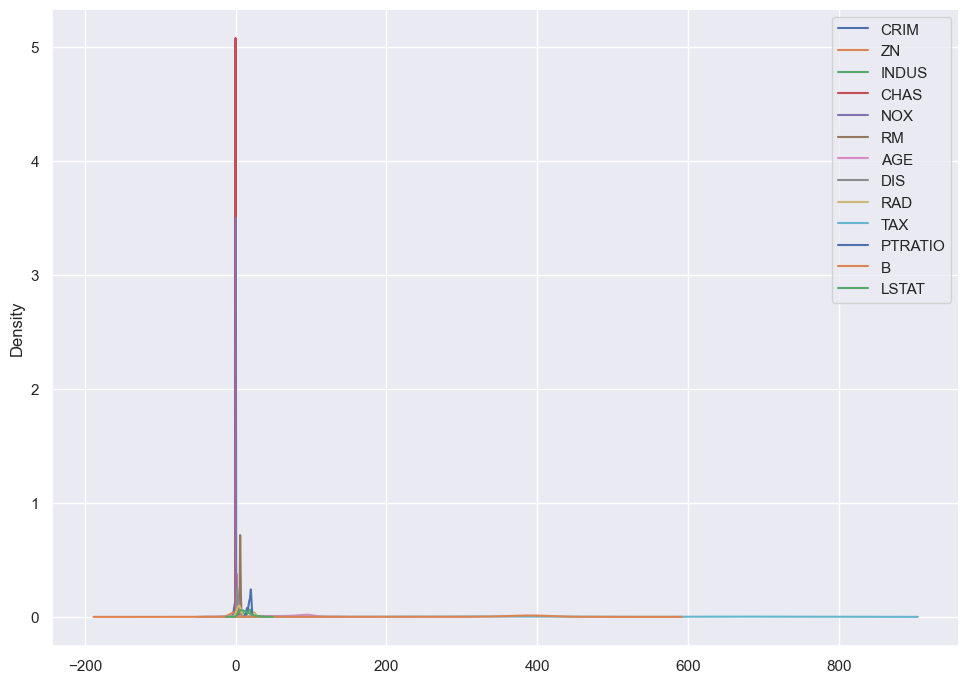

In [32]:
X.plot.density()

In [33]:
from sklearn import preprocessing

scalar = preprocessing.StandardScaler().fit(X, y)
X_Scaled = pd.DataFrame(scalar.transform(X), columns=X.columns)

<AxesSubplot: ylabel='Density'>

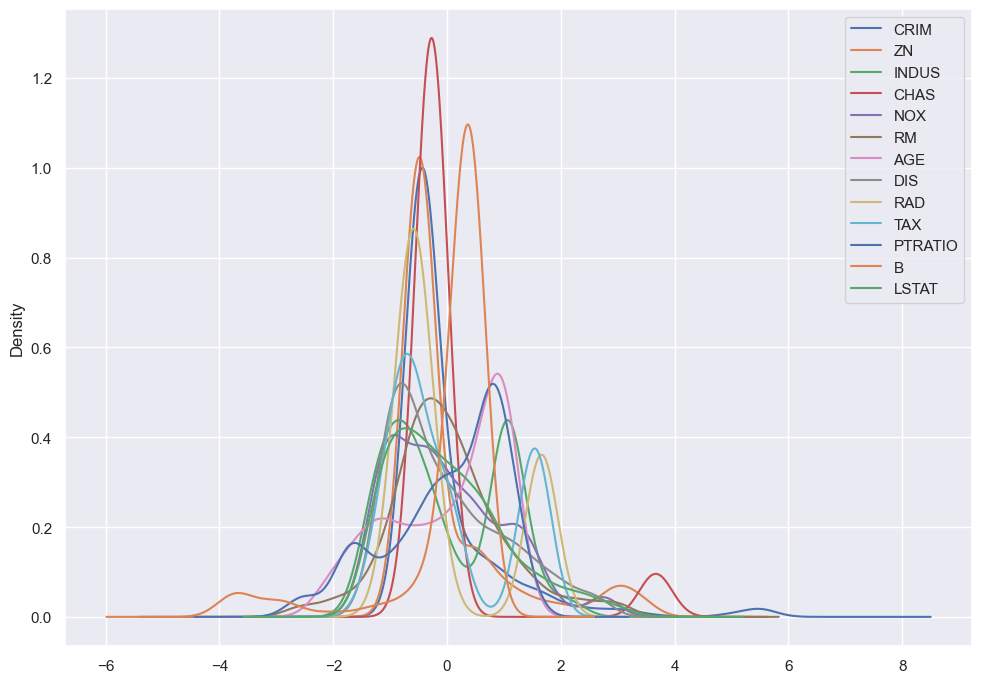

In [34]:
X_Scaled.plot.density()

## 2.2. Train/Test split

Train/Test split with a split of 30/70.

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split

# splitting the dataframe into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_Scaled,y,test_size=0.30,random_state=57)

Reduce features with pca (needs to be done after train/test split)

In [36]:
X_Scaled.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [37]:
from sklearn.decomposition import PCA

# approx. half of the features get used
pca = PCA(n_components=7)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## 2.3. Use the following Regression models with different hyperparameter settings (where applicable) and an appropriate cross-validation setup for your training:


### 2.3.1. Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X_train, y_train)
print(linear_model.score(X_train, y_train))
print(linear_model.coef_)
print(linear_model.intercept_)

score = linear_model.score(X_test, y_test)
print(score)

0.7080596206438913
[-2.24179377  2.42395725  2.95066602 -1.48593559 -3.06629601  0.04156352
 -0.37300408]
22.62824858757062
0.709258407846519


### 2.3.2. Polynomial Regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

test_poly_features = poly.fit_transform(X_test)
y_predicted = poly_reg_model.predict(test_poly_features)

score = poly_reg_model.score(test_poly_features, y_test)
print(score)

#print(np.vstack((y_predicted,y_test.values)).T)

0.7996836443546137


In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
rfe = RFE(linear_model)

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [41]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.015262,0.004359,0.001007,0.002412,1,{'n_features_to_select': 1},-0.363076,-0.102780,0.131618,-0.066014,...,0.089638,0.106559,0.096424,0.086632,0.093563,0.142443,0.085468,0.096274,0.107223,0.025675
1,0.014078,0.003706,0.000808,0.002423,2,{'n_features_to_select': 2},-0.226602,0.077460,0.479206,0.205678,...,0.201793,0.226314,0.217748,0.218080,0.221579,0.233895,0.208096,0.236509,0.225796,0.015578
2,0.012544,0.002938,0.001638,0.002766,3,{'n_features_to_select': 3},0.063270,-0.116519,0.532762,0.353216,...,0.310976,0.327554,0.323104,0.322181,0.611876,0.342905,0.302884,0.352907,0.359873,0.085741
3,0.006609,0.003378,0.000146,0.000437,4,{'n_features_to_select': 4},0.718171,0.568050,0.852690,0.771831,...,0.669170,0.676851,0.667858,0.686223,0.711463,0.703545,0.668577,0.699308,0.684786,0.015078
4,0.005353,0.004901,0.000162,0.000346,5,{'n_features_to_select': 5},0.694395,0.661926,0.862032,0.771652,...,0.693622,0.701860,0.689082,0.704803,0.743605,0.722713,0.688549,0.724412,0.708023,0.016650
5,0.003008,0.002187,0.000655,0.000536,6,{'n_features_to_select': 6},0.697412,0.652249,0.865439,0.776462,...,0.694095,0.702202,0.690310,0.705552,0.743903,0.724024,0.689227,0.725709,0.708839,0.016667
6,0.002401,0.003667,0.000796,0.002387,7,{'n_features_to_select': 7},0.697040,0.652011,0.865523,0.776546,...,0.694103,0.702205,0.690804,0.705560,0.744030,0.724520,0.689464,0.725755,0.708985,0.016660
7,0.001507,0.003022,0.001608,0.003216,8,{'n_features_to_select': 8},0.697040,0.652011,0.865523,0.776546,...,0.694103,0.702205,0.690804,0.705560,0.744030,0.724520,0.689464,0.725755,0.708985,0.016660
8,0.002697,0.004138,0.001307,0.002187,9,{'n_features_to_select': 9},0.697040,0.652011,0.865523,0.776546,...,0.694103,0.702205,0.690804,0.705560,0.744030,0.724520,0.689464,0.725755,0.708985,0.016660
9,0.001071,0.002445,0.001609,0.003219,10,{'n_features_to_select': 10},0.697040,0.652011,0.865523,0.776546,...,0.694103,0.702205,0.690804,0.705560,0.744030,0.724520,0.689464,0.725755,0.708985,0.016660


### 2.3.2. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

lab = preprocessing.LabelEncoder()
y_train_transformed = lab.fit_transform(y_train)
y_test_transformed = lab.fit_transform(y_test)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train_transformed)

pred_LogReg  = logistic_regression_model.predict(X_test)
print(np.vstack((pred_LogReg,y_test_transformed)).T)


score = logistic_regression_model.score(X_test, y_test_transformed)
print(score)

[[100  73]
 [100  55]
 [ 27  18]
 [ 80  60]
 [111  84]
 [111  33]
 [ 60   3]
 [100  60]
 [ 75  46]
 [100 112]
 [ 75  90]
 [ 59  45]
 [102  58]
 [100  75]
 [187 103]
 [ 51  30]
 [100  50]
 [ 85  91]
 [ 80  48]
 [ 80  87]
 [ 80  38]
 [100  68]
 [166  99]
 [ 97  61]
 [ 27  42]
 [ 43  55]
 [ 34  24]
 [100  95]
 [187 106]
 [ 34   6]
 [187 109]
 [ 80  28]
 [ 76  49]
 [127  53]
 [ 57  43]
 [ 43  78]
 [ 25  35]
 [100  97]
 [166  92]
 [ 76  37]
 [ 59  52]
 [ 39  11]
 [127  77]
 [100  65]
 [ 12   7]
 [166 105]
 [ 87  82]
 [ 80 118]
 [ 87  85]
 [ 75  34]
 [166  84]
 [100  96]
 [187  39]
 [100  70]
 [187  91]
 [102 106]
 [102  89]
 [ 34  47]
 [187 118]
 [ 87  54]
 [127 101]
 [ 80  20]
 [102 104]
 [111  43]
 [187 118]
 [127  89]
 [105  74]
 [102  89]
 [187 100]
 [ 34   8]
 [ 97  67]
 [ 73  51]
 [  2  11]
 [ 90  63]
 [100  80]
 [ 87  72]
 [187 117]
 [100  59]
 [187  87]
 [  5   4]
 [187 102]
 [ 27  26]
 [111  49]
 [ 43  32]
 [ 76  15]
 [105  81]
 [ 43  36]
 [ 73  72]
 [ 87  83]
 [111  22]
 [166  86]

c:\users\andi\documents\github\fh-mc-ml\exercise\ue02\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Estimate the models’ performances on the test set again with two different error/performance measurements

R^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.
MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y.
MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.
RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.
MedAE: Median absolute error regression loss.
MAPE: Mean absolute percentage error regression loss.

In [43]:
import sklearn.metrics as metrics

def print_performance_statistics(y_pred):
    print('R^2:', metrics.r2_score(y_test, y_pred))
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('MedAE:', metrics.median_absolute_error(y_test, y_pred))
    print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

In [44]:
# Linear Regression
print_performance_statistics(linear_model.predict(X_test))

R^2: 0.709258407846519
MAE: 3.2594807774433847
MSE: 24.089668446523024
RMSE: 4.9081227008422506
MedAE: 2.3932845034993164
MAPE: 0.19275677769898278


In [45]:
# Polynomial Regression
print_performance_statistics(poly_reg_model.predict(poly.fit_transform(X_test)))

R^2: 0.7996836443546137
MAE: 2.4902513865609053
MSE: 16.597400310602136
RMSE: 4.073990710667139
MedAE: 1.6285390115139595
MAPE: 0.1341021315009472


In [46]:
# Logistic regression
print_performance_statistics(logistic_regression_model.predict(X_test))

R^2: -80.18546808623384
MAE: 69.72500000000001
MSE: 6726.698421052632
RMSE: 82.01645213646242
MedAE: 68.69999999999999
MAPE: 3.028395231314549


## 2.5. Explain which model you would use in deployment and why